# Titanic Notebook 

Strategy - Follow [Manav Sehgal](https://www.kaggle.com/startupsci/titanic-data-science-solutions)'s kernel + add necessary additional information especially around new techniques 


## Problem definition

> In this [challenge](https://www.kaggle.com/c/titanic), we ask you to complete the analysis of what sorts of people were likely to survive. 
> In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy


## Acquire training and testing data

using the [API](https://github.com/Kaggle/kaggle-api): 
```
kaggle competitions download -c titanic -p ~/titanic
```
[variables](https://www.kaggle.com/c/titanic/data): 

- *survival* 	Survival
- *pclass* 	Ticket class
- *sex* 	Sex 	
- *age* 	Age in years 	
- *sibsp* 	# of siblings / spouses aboard the Titanic 	
- *parch* 	# of parents / children aboard the Titanic 	
- *ticket* 	Ticket number 	
- *fare* 	Passenger fare 	
- *cabin* 	Cabin number 	
- *embarked* 	Port of Embarkation


### first impression: 
- H: pclass: Of course the ticket class should be a good variable to see that the prob to survive will increase if the person has higher ticket class (i.e. first class). <br>
- H: sex: from the introduction it seems that being a woman will help increase the prob to survive <br>
- H: age: not sure <br>
- H: sibsp: maybe having a family onboard will decrease your chance to survive <br>
- H: parch: same thing here <br>
- H: fare: more you pay --> richer you are --> increase prob to survive <br>
- H: cabin: same thing here: would be interesting to see if your Cabin begins with a certain letter you have more prob to survive --> you are positioned in a better place of the Titanic. <br>
- H: embarked: not sure  <br>

see [Import Data](#Import-Data)

## Wrangle, prepare, cleanse the data.

First, analyse the dataset. Understand the meaning of the var and see if you need to clean or correct the data set from missing data etc. 
The idea is to combine the test and training set and do the necessary transfomartion. 
Then, based on the necessity create new var. 

see [Analyse the Dataset](#Analyse-the-Dataset)

## Analyze, identify patterns, and explore the data

## Model, predict and solve the problem

## Visualize, report, and present the problem solving steps and final solution

## Supply or submit the results


---
## Import Library


In [3]:
# data analysis 
import pandas as pd 
import numpy as np
import random as rnd 

# Data visualization 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# ML 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC # Linear Support Vector Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #Linear classifiers with SGD (stochastic gradient descent) 
from sklearn.tree import DecisionTreeClassifier


---
## Import Data
Import the two data sets available: test & train by using Pandas DataFrames 

In [4]:
train = pd.read_csv('~/Kaggle-Titanic/input/train.csv')
test = pd.read_csv('~/Kaggle-Titanic/input/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()
# only difference is the absence of the secon column 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
combine = [train, test]
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

---
## Analyse the dataset 
Familiarise with the variables 


In [7]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


__1. Numerical__
> 1.1 Continuous: Age, Fare <br>
> 1.2 Discreate: SibSp, Parch
    
__2. Categorical__
> 2.1 Nominal: Survived, Cabin, Embarked, PassengerId, Name, Sex, Ticket <br>
> 2.2 Ordinal: Pclass, 


__Which features contain blank, null or empty values?__

Train Set

- _Null_: Age, Cabin and Embarked contain Null values 
- _Sample_: in train we have 891 units which represent the 40% of the whole population (2224)
- _Survival rate_: 38.38% (apparently the actual survival rate is 32%)
- _Fare_: despite the max level is 512, 75% of the sample spent less of equal to 31. (the mean is 32). 
- _Parch_: most of the sample (>75%) travelled without parent or children. 


In [8]:
train.info()
print('__'*20)
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check the [quantile](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)

In [9]:
train.quantile([.1,.99]) # check only particular percentile 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0.10,90.0,0.0,1.0,14.00,0.0,0.0,7.55000
0.99,882.1,1.0,3.0,65.87,5.0,4.0,249.00622


In [10]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


__What is the distribution of categorical features?__

- _Unique_: we can see that the values in the colum are correct: 2 type for Sex, 3 for Embarked. 
- _Sex_: 557/891 = male% -> 64.75% male 
- _Ticket_: no null value but the unique values are not 891 so assume that differnt people have the same ticket. indeed max freq is 7 in some cases. -> duplicates. 
- _Cabin_: same thing here. there are some duplicates. 
- _Embarked_: S port is the most used type 

In [11]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dakic, Mr. Branko",male,1601,B96 B98,S
freq,1,577,7,4,644


Test Set

- _Null_: Age, Fare, and Cabin contain null values 
- _Ticket_: there is the same problem of duplicates seen in the Training set 



In [12]:
test.info()
print('__'*20)
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
________________________________________


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Hays, Mr. Charles Melville",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


---
## Assumptions
based on the dataset analysis:  

**Classifying**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

**Creating**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

**Correcting**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Completing**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correlating**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.


## Pivoting Features 
we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Pclass**: def if you are in the first class you have more probability to survive. Keep the var
- **Sex**: confirming the assumption that sex='female' has a higher survival rate.
- **SibSp** and **Parch** the hypothesis is that if the passenger has from 0 to 3 family members to worry about, there is still a good chance to survive. However, for family with higher number of members the survival rate decreases. Confirms the idea to create a var 'Family' that takes into account both values. 

In [14]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train[['SibSp','Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train[['Parch','Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


---
## Visualizing Data

Anaysing our assumption using visualization 

- Correlating numerical features: Age vs Survived
- Correlating numerical and ordinal features: Pclass, Age vs Survived
- Correlating categorical features: Embarkerd, Pclass, Sex vs Survived
- Correlating categorical and numerical features: Embarked, Sex, Fare vs Survived


### Correlating numerical features: Age vs Survived

**Observations**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).


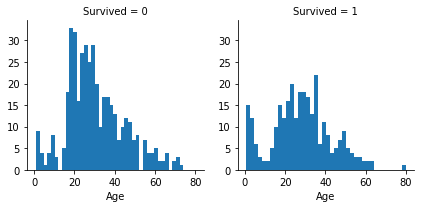

In [18]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=40)

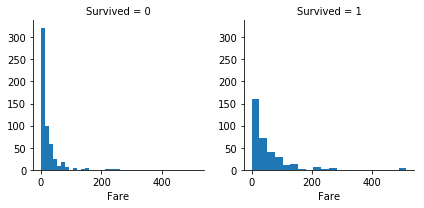

In [19]:
h = sns.FacetGrid(train, col = 'Survived')
h.map(plt.hist, 'Fare',bins = 20)

### Correlating numerical and ordinal features: Pclass, Age vs Survived
**Observations**

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

**Decisions**

- Consider Pclass for model training.

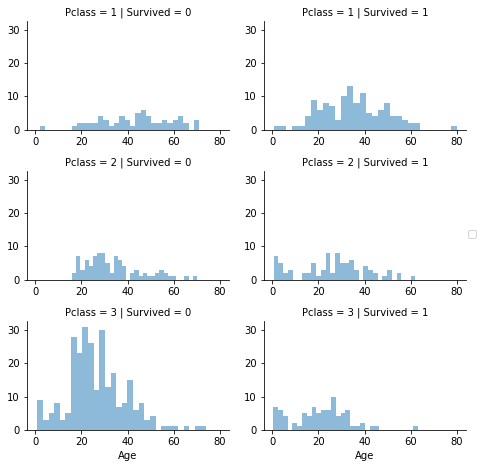

In [20]:
cl = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', size = 2.2, aspect= 1.5)
cl.map(plt.hist, 'Age', alpha=.5, bins = 30)
cl.add_legend()

#alpha = opacity level

### Correlating categorical features: Embarkerd, Pclass, Sex vs Survived

**Observations**

- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

**Decisions**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.


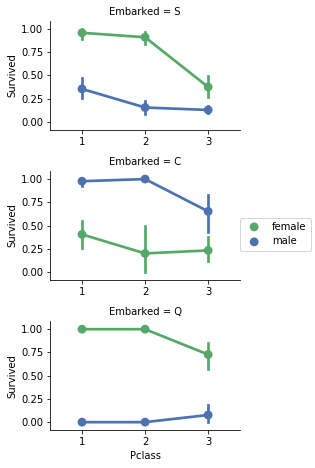

In [21]:
emb = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
emb.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
emb.add_legend()

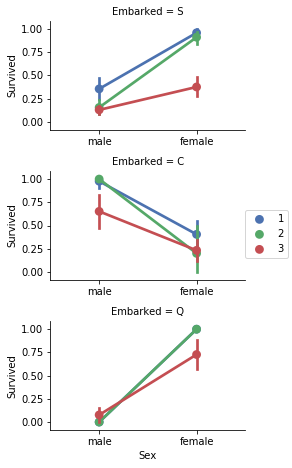

In [22]:
emb1 = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
emb1.map(sns.pointplot, 'Sex', 'Survived', 'Pclass', palette='deep')
emb1.add_legend()

In [23]:
# I cannot see any first class in Q. Were there any first class people in port Q? Yes, only Mr and Ms Minahan
ch = train[(train.Embarked == 'Q') & (train.Pclass == 1)]
ch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q


### Correlating categorical and numerical features: Embarked, Sex, Fare vs Survived

**Observations**

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decisions**

- Consider banding Fare feature.

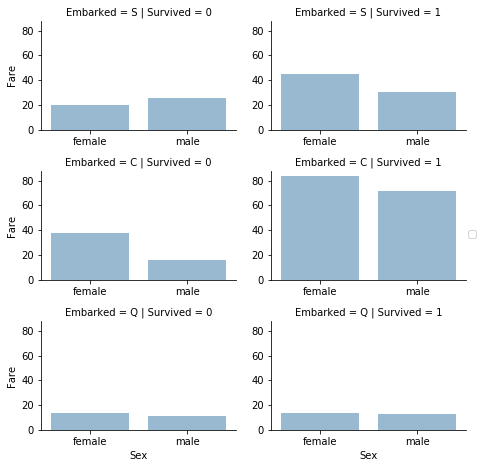

In [24]:
emb3 = sns.FacetGrid(train, col = 'Survived', row = 'Embarked', size = 2.2, aspect = 1.5)
emb3.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None) #ci = Size of confidence intervals
emb3.add_legend()

----
## Wrangle Data 
### Correcting by dropping features

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.
Note that where applicable we perform operations on both training and testing datasets together to stay consistent.





In [96]:

print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

train_df = train.drop(['Ticket', 'Cabin'], axis=1)
test_df = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 10) (418, 10)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [97]:
for dataset in combine: 
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [29]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [98]:
for dataset in combine: 
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [99]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [100]:
train_df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

,Title,Age
0,Master,4.574167
1,Miss,21.845638
2,Mr,32.368090
3,Mrs,35.788991
4,Rare,45.545455


In [101]:
# convert the categorical titles to ordinal.

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [102]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 29.5+ KB


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms.

In [103]:
sex_mapping = {"female": 1, "male": 0}
for dataset in combine : 
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.7+ KB


In [53]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

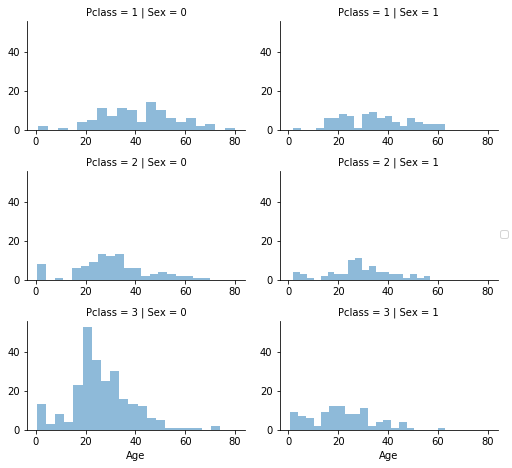

In [104]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [105]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [106]:
for dataset in combine: 
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1 )]['Age'].dropna()
            age_median = guess_df.median()
            guess_ages[i,j] = age_median
guess_ages 

array([[ 42.,  28.,  24.],
       [ 41.,  24.,  22.]])

In [107]:
for dataset in combine: 
    for i in range(0,2): 
        for j in range(0,3): 
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex']==i) & (dataset['Pclass']==j+1), 'Age'] = guess_ages[i,j].astype(int)
    dataset['Age'] = dataset['Age'].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 62.7+ KB


Let us create Age bands and determine correlations with Survived.

In [108]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [109]:
for dataset in combine: 
    dataset.loc[(dataset['Age']<=16), 'Age'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'Age'] = 1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48), 'Age'] = 2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'Age'] = 3
    dataset.loc[(dataset['Age']>64), 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can now remove the AgeBand feature.

In [110]:
train_df = train_df.drop('AgeBand', axis = 1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [111]:
combine = [train_df, test_df]

### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [112]:
for dataset in combine: 
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [113]:
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,2
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,1
5,0,3,0,1,0,0,8.4583,Q,1,1
6,0,1,0,3,0,0,51.8625,S,1,1
7,0,3,0,0,3,1,21.0750,S,4,5
8,1,3,1,1,0,2,11.1333,S,3,3
9,1,2,1,0,1,0,30.0708,C,3,2


In [114]:
# loner 
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [115]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,1,2,0
1,1,1,1,2,71.2833,C,3,2,0
2,1,3,1,1,7.9250,S,2,1,1
3,1,1,1,2,53.1000,S,3,2,0
4,0,3,0,2,8.0500,S,1,1,1


We can also create an artificial feature combining Pclass and Age.

In [116]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [117]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the Embarked feature by creating a new numeric Port feature.

In [118]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,2,0,3
1,1,1,1,2,71.2833,1,3,2,0,2
2,1,3,1,1,7.9250,0,2,1,1,3
3,1,1,1,2,53.1000,0,3,2,0,2
4,0,3,0,2,8.0500,0,1,1,1,6


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

In [119]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1.0,1,1,6
1,893,3,1,2,7.0000,0,3.0,2,0,6
2,894,2,0,3,9.6875,2,1.0,1,1,6
3,895,3,0,1,8.6625,0,1.0,1,1,3
4,896,3,1,1,12.2875,0,3.0,3,0,3


In [120]:
# Fare Bands

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,0,0,1,2,0,3
1,1,1,1,2,3,1,3,2,0,2
2,1,3,1,1,1,0,2,1,1,3
3,1,1,1,2,3,0,3,2,0,2
4,0,3,0,2,1,0,1,1,1,6
5,0,3,0,1,1,2,1,1,1,3
6,0,1,0,3,3,0,1,1,1,3
7,0,3,0,0,2,0,4,5,0,0
8,1,3,1,1,1,0,3,3,0,3
9,1,2,1,0,2,1,3,2,0,0


### Label Encoder 

To achive the same result an alternative would be to use the The LabelEncoder in Scikit-learn : it will convert each unique string value into a number, making out data more flexible for various algorithms. 
See this [Kernel](https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish) 


In [ ]:
# Example - do not run bc the variables are not the same as the ones that I used. 
###--------------------
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

####---------------------

----
## Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- [Logistic Regression](#1.1)
- [KNN or k-Nearest Neighbors](#1.2)  
- [Support Vector Machines](#1.3)
- [Naive Bayes classifier](#1.4)
- [Decision Tree](#1.5)
- [Random Forrest](#1.6)
- [Perceptron](#1.7)
- [Linear SVC](#1.8)
- [Stochastic Gradient Descent](#1.9)

to Do: 
- Artificial neural network
- RVM or Relevance Vector Machine


###  Prepare the datasets 

In [121]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

## Logistic regression <a id='1.1'></a>
Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [122]:
# from scikit-learn
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
Y_pred = logreg.predict(X_test)
Y_pred[0:5]

array([0, 0, 0, 0, 1])

In [135]:
#Accuracy
Y_train_pred = logreg.predict(X_train)
logreg.score(X_train, Y_train)

0.81593714927048255

In [136]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


81.590000000000003

In [138]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_train_pred))

             precision    recall  f1-score   support

          0       0.84      0.87      0.85       549
          1       0.77      0.73      0.75       342

avg / total       0.81      0.82      0.81       891



In [140]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

/Users/erikaagostinelli/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.425996
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Mon, 26 Mar 2018   Pseudo R-squ.:                  0.3603
Time:                        17:05:38   Log-Likelihood:                -379.56
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.403e-87
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.5086      0.157     -3.231      0.001      -0.817      -0.200
Sex            2.3147      0.

regularization? 

## SVM - Support vector machine  <a id='1.3'></a>

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [141]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.840000000000003

## K-Nearest Neighbors <a id='1.2'></a>

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [143]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.180000000000007

## Gaussian Naive Bayes <a id='1.4'></a>

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [144]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.359999999999999

## Perceptron <a id='1.7'></a>

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [145]:

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/Users/erikaagostinelli/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


81.140000000000001

## Linear SVC <a id='1.8'></a>



In [146]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.480000000000004

## Stochastic Gradient Descent <a id='1.9'></a>

In [147]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/Users/erikaagostinelli/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


75.760000000000005

## Decision Tree <a id='1.'></a>

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [148]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.549999999999997

## Random Forest <a id='1.6'></a>

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [149]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.549999999999997

In [164]:
# training 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train2, Y_train2)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train2, Y_train2)
acc_random_forest = round(random_forest.score(X_train2, Y_train2) * 100, 2)
acc_random_forest

88.620000000000005

In [ ]:
# Cross- validation  
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_CV, Y_CV)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_CV, Y_CV)
acc_random_forest = round(random_forest.score(X_CV, Y_CV) * 100, 2)
acc_random_forest

----
## Model evaluation

In [151]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.55
8,Decision Tree,88.55
1,KNN,84.18
0,Support Vector Machines,83.84
2,Logistic Regression,81.59
7,Linear SVC,81.48
5,Perceptron,81.14
4,Naive Bayes,80.36
6,Stochastic Gradient Decent,75.76


We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

--- 
## Submission 


In [154]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('~/Kaggle-Titanic/submission.csv', index=False)


--- 
### Questions / critiques: 

- why not checking the betas of each model (i did it in the log but not analysed accurately) and focusing only on the accuracy ? (not even precision and recall apparently)
- why not dividing the training set into 2 other dataset so to have your train, cross validation and only after, the test dataset - also knowing the difference between leader and private leaderboard - it's better to cross-validate before submission. 
- lack of K-Fold analysis 
- where is the analysis on the bias and variance 
- lack of regularization - which feature to keep 
- is it safe to delete features before even trying to fit them into a model? why you need to drop them at all? cannot you just select the features that are going to fit the model like we do in R? eg family size 
- creating bands of ages and fares - necessary? 
- didn't quite like how we decided to impute the age - why we used only Sex and Pclass? (and not include the Title for example?) [Megan](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic) is using mice imputation or mentioning recursive partitioning for regression. 


----
## Continuing the analysis... 

Jeff D. in this [Kernel](https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish) present GridSearch + K-fold which was missing in this analysis. 

### Splitting up the Training Data

Scope: dividing the training set into an actual training set and a cross validation set (20%) so that I can validate my model before using my test set.

In [159]:
from sklearn.model_selection import train_test_split

X_all = train_df.drop(['Survived'], axis=1)
Y_all = train_df['Survived']

num_test = 0.20
X_train2, X_CV, Y_train2, Y_CV = train_test_split(X_train, Y_train, test_size=num_test, random_state=23)


### GridSerach

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


# Choose the type of classifier. 
clf = RandomForestClassifier()  # note that we didnt not select the num of estimators this time 

# Choose some parameter combinations to try
parameters = {'n_estimators': [10, 100, 150], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }


# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
# for info on the parameters 


# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train2, Y_train2)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train2, Y_train2)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [167]:
# Training 
predictions = clf.predict(X_train2)
print(accuracy_score(Y_train2, predictions))

0.837078651685


In [168]:
# Cross-validation 
predictions = clf.predict(X_CV)
print(accuracy_score(Y_CV, predictions))

0.810055865922
